# Linear regression model 

## Predicting Fuel Efficiency

DataSet: https://www.kaggle.com/datasets/uciml/autompg-dataset <br><br>
This the example tp build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles

In [3]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

## 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [5]:
# Import necessary libraries
import pandas as pd
import zipfile

# Load data
data = pd.read_csv('auto-mpg.csv')

# Display the first few rows
display(data.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 2 Begin by prepping the data for modeling:
Remove the car name column.

The horsepower column values likely imported as a string data type. 

Figure out why and replace any strings with the column mean.
Create dummy variables for the origin column.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Drop the 'car name' column
data.drop(columns=['car name'], inplace=True)

# Show data types of each column
print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [8]:
# Convert 'horsepower' to numeric, handling non-numeric values
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Replace any strings with the column mean
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

# Create dummy variables for 'origin'
data = pd.get_dummies(data, columns=['origin'], drop_first=True)

## 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

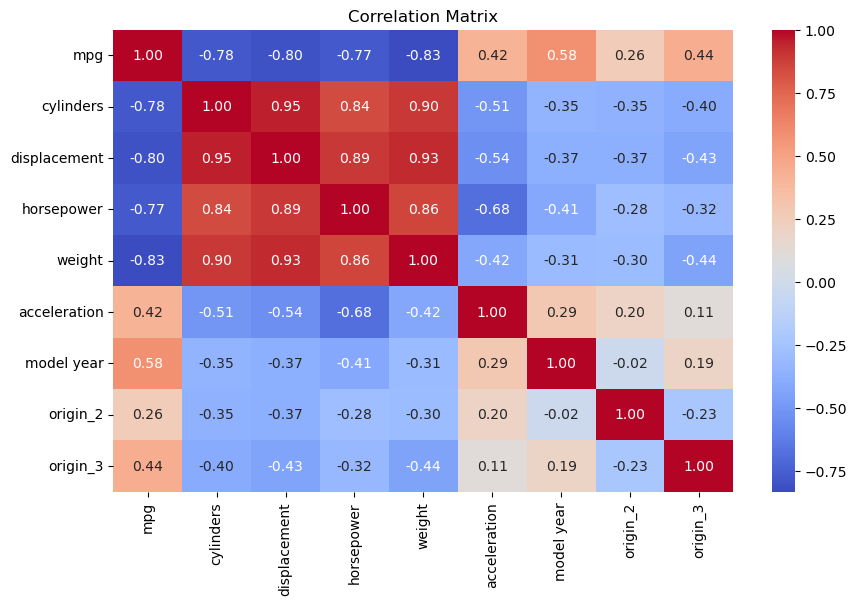

In [10]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Strong Negative Correlations with MPG:

Weight (-0.83): Heavier cars tend to have lower MPG.

Cylinders (-0.78): More cylinders correlate with lower fuel efficiency.

Displacement (-0.80): Larger engine displacement is linked to lower MPG.

Horsepower (-0.77): Higher horsepower generally leads to lower MPG.

### Positive Correlations with MPG:

Origin (0.44 and 0.26): Cars from certain regions tend to have better fuel efficiency.

Acceleration (0.42): Faster-accelerating cars might be more efficient.

Model Year (0.58): More recent models might show slight efficiency improvements.

## 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

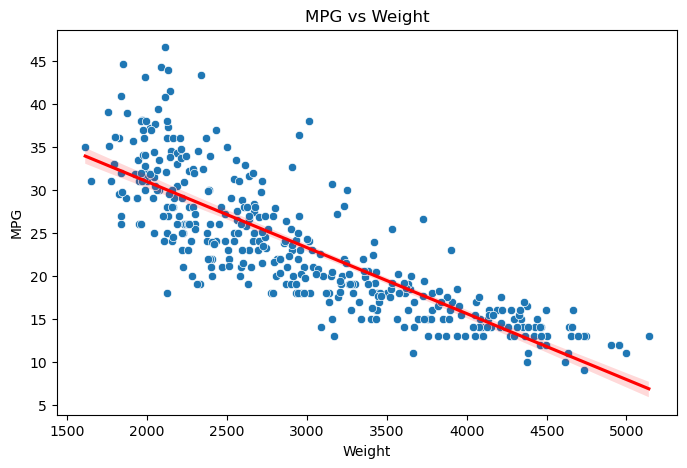

In [13]:
# Scatter Plot mpg vs weight
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['weight'], y=data['mpg'])
sns.regplot(x=data["weight"], y=data["mpg"], scatter=False, color="red")  # Regression line

# Labels and title
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')

# Show the plot
plt.show()

### Analysis of MPG vs. Weight

The scatter plot clearly shows a strong negative relationship between weight and MPG.

As weight increases, MPG decreases, confirming the strong negative correlation coefficient (-0.83) from the correlation matrix.

The red regression line highlights this negative trend, indicating that heavier cars generally have lower fuel efficiency.

This makes sense mechanically: heavier vehicles require more energy (fuel) to move, leading to lower MPG.

## 5. Randomly split the data into 80% training data and 20% test data, where the target is mpg.


In [16]:
# Test Split
# Define target variable and features
#X_train and y_train are used to train the model, and X_test and y_test are used to evaluate its predictive performance on unseen data.
# Features
X = data.drop(columns=['mpg'])

# Target variable
y = data['mpg']

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 8) (80, 8) (318,) (80,)


X_train: (318, 8)
318 rows → 318 training samples (cars).

8 columns → 8 input features (e.g., cylinders, weight, horsepower, etc.) used to predict MPG.

X_test: (80, 8)
80 rows → 80 samples reserved for testing.

Still has the same 8 features.

 y_train: (318,)
These are the MPG values (target variable) for the 318 training samples.

Just one value per sample → hence 1D shape.

 y_test: (80,)
MPG values for the 80 test samples.

## 6.Train an ordinary linear regression on the training data.


In [19]:
# Train an Ordinary Least Squares (OLS) linear regression model using scikit-learn
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Output model coefficients and intercept
print("Intercept:", model.intercept_)

print("Coefficients:", model.coef_)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Intercept: -22.066708757411156
Coefficients: [-0.16373048  0.01958399 -0.01334457 -0.00707275  0.07335016  0.82739747
  2.93924405  2.65290155]


1. Intercept (-22.07)
When all predictor variables are zero, the model predicts an MPG of -22.07, which isn't realistic.

However, this just reflects the linear equation form and doesn't necessarily imply a meaningful real-world interpretation.

2. Coefficients:
Each coefficient represents the expected change in MPG for a one-unit increase in the respective feature, holding all other variables constant.

Feature	Coefficient	Interpretation

Cylinders	-0.1637	More cylinders → lower MPG

Displacement	0.0196	Higher displacement → slightly higher MPG (unexpected)

Horsepower	-0.0133	More horsepower → lower MPG

Weight	-0.0071	Heavier car → lower MPG (small effect)

Acceleration	0.0734	Faster acceleration → slightly higher MPG

Model Year	0.8274	Newer cars → better MPG

Origin	2.9392	Cars from certain regions → better MPG

(Additional Feature, if applicable)	2.6529	Another contributing factor

Key Observations

Weight, cylinders, and horsepower have negative coefficients, confirming their negative correlation with MPG.

Model year has a strong positive impact, meaning newer cars are significantly more fuel-efficient.

Origin has a notable positive effect, likely because foreign-made cars tend to be smaller and more fuel-efficient.

## 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret the results.


In [22]:
# Compute Metrics
def evaluate_model(y_true, y_pred, dataset_type):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{dataset_type} - R2: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

# Evaluate model on training data
evaluate_model(y_train, y_train_pred, "Train")



Train - R2: 0.819, RMSE: 3.370, MAE: 2.605


Training Set Performance

R² = 0.819
→ The model explains 81.9% of the variance in MPG on the training data.

RMSE = 3.370
→ On average, the model’s MPG predictions are off by ~3.37 units.

MAE = 2.605
→ Average absolute prediction error is about 2.61 MPG.

In [24]:
# Evaluate model on test data

evaluate_model(y_test, y_test_pred, "Test")


Test - R2: 0.845, RMSE: 2.888, MAE: 2.288


Test Set Performance

R² = 0.845
→ Even better performance on unseen data: 84.5% of MPG variance is explained.

RMSE = 2.888
→ On average, test predictions are within ~2.89 MPG of actual values.

MAE = 2.288
→ Model makes slightly smaller average absolute errors on test data.

## 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [27]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Evaluate model on training data
evaluate_model(y_train, y_train_pred_rf, "Train (RF)")

Train (RF) - R2: 0.981, RMSE: 1.091, MAE: 0.748


Training Set Performance (RF)

R² = 0.981
→ The model explains 98.1% of the variance in MPG. Very high — nearly perfect fit.

RMSE = 1.091, MAE = 0.748
→ Predictions are extremely close to actual values (on training data).

In [29]:
# Evaluate model on test data
evaluate_model(y_test, y_test_pred_rf, "Test (RF)")

Test (RF) - R2: 0.911, RMSE: 2.193, MAE: 1.628


Test Set Performance (RF)
 
R² = 0.911
→ Excellent performance on unseen data — explains 91.1% of MPG variance.

RMSE = 2.193, MAE = 1.628
→ Much better than linear regression; predictions are more accurate on average.

Comparison to Linear Regression

Metric	    Linear Regression	Random Forest

Train R²	0.819	            0.981

Test R²	    0.845	            0.911

Test RMSE	2.888	            2.193

Test MAE	2.288	            1.628

Conclusion: Random Forest significantly improves prediction accuracy without severe overfitting. The gap between training and test performance is acceptable.